# MeterGroup, ElecMeter, seleccion y estadisticas básicas

Todos los conjuntos de datos de NILM constan de varios grupos de medidores de electricidad. Podemos agrupar los contadores por casa. O por el tipo de aparato al que están conectados directamente. O por frecuencia de muestreo. O si el medidor es un "medidor de sitio" para toda la casa o un submedidor a nivel de electrodomésticos, o un submedidor a nivel de circuito.

En NILMTK, una de las clases clave es MeterGroup, que almacena una lista de medidores y nos permite seleccionar un subconjunto de medidores, agregar energía de todos los medidores y muchas otras funciones

Cuando abrimos por primera vez un `DataSet`, NILMTK crea varios objetos` MeterGroup`. Hay `nilmtk.global_meter_group` que contiene todos los medidores cargados actualmente (incluso de varios conjuntos de datos si ha abierto más de un conjunto de datos). También hay un `MeterGroup` por edificio (que vive en el atributo` Building.elec`). También anidamos "MeterGroups" para agregar redes de fase dividida, red trifásica y aparatos de suministro dual (240 voltios) en conjuntos de datos de América del Norte y Canadá. Por ejemplo, aquí está el `MeterGroup` para el edificio 1 en REDD:

**NOTA**:  Si está en Windows, recuerde evitar las barras diagonales inversas, usar barras inclinadas hacia adelante o usar cadenas sin formato al pasar rutas en Python, p. Ej. uno de los siguientes funcionaría:

```python
redd = DataSet('c:\\data\\redd.h5')
redd = DataSet('c:/data/redd.h5')
redd = DataSet(r'c:\data\redd.h5')
```

In [1]:
%matplotlib inline

In [2]:
from matplotlib import rcParams
import matplotlib.pyplot as plt
import pandas as pd
import nilmtk
from nilmtk import DataSet, MeterGroup

plt.style.use('ggplot')
rcParams['figure.figsize'] = (13, 10)

dsualm = DataSet('dsual.h5')
elec = dsualm.buildings[1].elec
elec

MeterGroup(meters=
  ElecMeter(instance=1, building=1, dataset='DSUAL', site_meter, appliances=[])
  ElecMeter(instance=2, building=1, dataset='DSUAL', appliances=[Appliance(type='boiler', instance=1)])
  ElecMeter(instance=3, building=1, dataset='DSUAL', appliances=[Appliance(type='fan', instance=1)])
  ElecMeter(instance=4, building=1, dataset='DSUAL', appliances=[Appliance(type='freezer', instance=1)])
  ElecMeter(instance=5, building=1, dataset='DSUAL', appliances=[Appliance(type='television', instance=1)])
  ElecMeter(instance=6, building=1, dataset='DSUAL', appliances=[Appliance(type='vacuum cleaner', instance=1)])
  ElecMeter(instance=7, building=1, dataset='DSUAL', appliances=[Appliance(type='light', instance=1)])
)

Tenga en cuenta que hay dos grupos de medidores anidados: uno para el horno eléctrico y otro para la lavadora secadora (ambos son electrodomésticos de 240 voltios y tienen dos medidores por electrodoméstico):

In [3]:
elec.nested_metergroups()

[]

Poner estos medidores en un grupo de medidores nos permite sumar fácilmente la demanda de energía registrada por ambos medidores para obtener la demanda de energía total para todo el aparato (pero también es muy fácil ver la demanda de energía del medidor individual).

Podemos obtener fácilmente un grupo de medidores(MeterGroup)  de los submedidores o de la red

In [4]:
elec.mains()

ElecMeter(instance=1, building=1, dataset='DSUAL', site_meter, appliances=[])

Podemos obtener fácilmente la suma de los datos de potencia de ambos medidores de red:

In [5]:
elec.mains().power_series_all_data().head()

2021-11-10 18:08:48+01:00     309.806488
2021-11-10 18:08:49+01:00    1503.478027
2021-11-10 18:08:50+01:00    1325.751953
2021-11-10 18:08:51+01:00    1321.244019
2021-11-10 18:08:52+01:00    1326.855957
Name: (power, active), dtype: float32

In [6]:
elec.submeters()

MeterGroup(meters=
  ElecMeter(instance=2, building=1, dataset='DSUAL', appliances=[Appliance(type='boiler', instance=1)])
  ElecMeter(instance=3, building=1, dataset='DSUAL', appliances=[Appliance(type='fan', instance=1)])
  ElecMeter(instance=4, building=1, dataset='DSUAL', appliances=[Appliance(type='freezer', instance=1)])
  ElecMeter(instance=5, building=1, dataset='DSUAL', appliances=[Appliance(type='television', instance=1)])
  ElecMeter(instance=6, building=1, dataset='DSUAL', appliances=[Appliance(type='vacuum cleaner', instance=1)])
  ElecMeter(instance=7, building=1, dataset='DSUAL', appliances=[Appliance(type='light', instance=1)])
)

## Estadisticas para  MeterGroups

### Proporcion de energia submedida

Calculemos la proporción de energía submedida en el edificio 1:

In [54]:
elec.proportion_of_energy_submetered()

Running MeterGroup.proportion_of_energy_submetered...


nan

Tenga en cuenta que NILMTK ha emitido una advertencia de que Mains usa un tipo diferente de medición de potencia que todos los submedidores, por lo que no es una comparación del todo precisa. Lo que plantea la pregunta: ¿qué tipo de medidas de potencia se utilizan para la red y los submedidores? Vamos a averiguar..

### Potencia activa, aparente y  reactiva

In [55]:
mains = elec.mains()

In [56]:
mains.available_ac_types('power')

['active', 'apparent', 'reactive']

In [57]:
elec.submeters().available_ac_types('power')

['active', 'apparent', 'reactive']

In [58]:
next(elec.load())

TypeError: '<' not supported between instances of 'Timestamp' and 'NoneType'

###  Energia total

In [59]:
elec.mains().total_energy() # returns kWh

Series([], dtype: float64)

### Energia por submedidor 

In [60]:
energy_per_meter = elec.submeters().energy_per_meter() # kWh, again
energy_per_meter

6/6 ElecMeter(instance=7, building=1, dataset='DSUAL', appliances=[Appliance(type='light', instance=1)])ance=1)])

,"(2, 1, DSUAL)","(3, 1, DSUAL)","(4, 1, DSUAL)","(5, 1, DSUAL)","(6, 1, DSUAL)","(7, 1, DSUAL)"
active,0.068263,0.001876,0.003843,NaN,0.038443,0.000247
apparent,NaN,NaN,NaN,NaN,NaN,NaN
reactive,NaN,NaN,NaN,NaN,NaN,NaN


Los encabezados de columna son los números de instancia de ElecMeter.

La funcion `fraction_per_meter` lo mismo que  `energy_per_submeter` excepto que devuelve la fraccion de energia por medidor 

### Seleccionar contadores en función de su consumo energético

Hagamos un nuevo MeterGroup que solo contenga los ElecMeters que usaron más de 20 kWh:

In [61]:
# energy_per_meter es un DataFrame donde cada fila es un
# tipo de potencia ('activa', 'reactiva' o 'aparente').
# Todos los medidores de electrodomésticos en REDD están registrados como 'activos', así que seleccione
# la fila 'activa':
energy_per_meter = energy_per_meter.loc['active']
more_than_20 = energy_per_meter[energy_per_meter > 20]
more_than_20

Series([], Name: active, dtype: float64)

In [62]:
instances = more_than_20.index
instances

Index([], dtype='object')

## Trazar la fracción del consumo de energía de cada aparato.

In [63]:
fraction = elec.submeters().fraction_per_meter().dropna()

6/6 ElecMeter(instance=7, building=1, dataset='DSUAL', appliances=[Appliance(type='light', instance=1)])ance=1)])

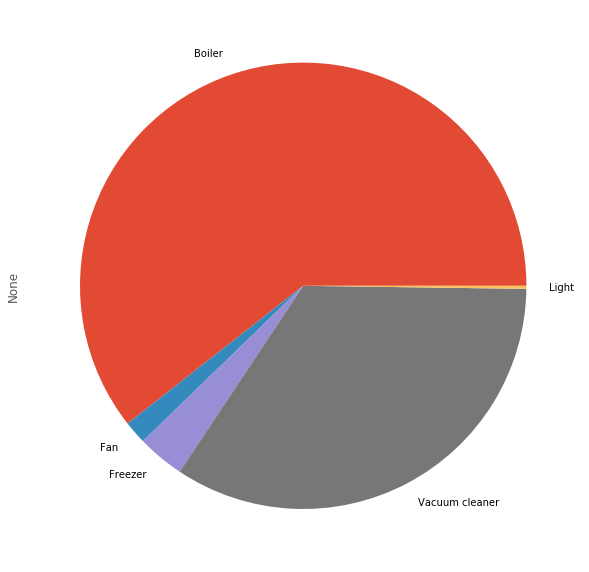

In [64]:
# Creacion de convenientes etiquetas
labels = elec.get_labels(fraction.index)
plt.figure(figsize=(10,30))
fraction.plot(kind='pie', labels=labels);

### Dibujar diagrama de cableado

Podemos obtener el diagrama de cableado para MeterGroup:

(<networkx.classes.digraph.DiGraph at 0x1d5d5a4e278>,
 <matplotlib.axes._axes.Axes at 0x1d5d2f242b0>)

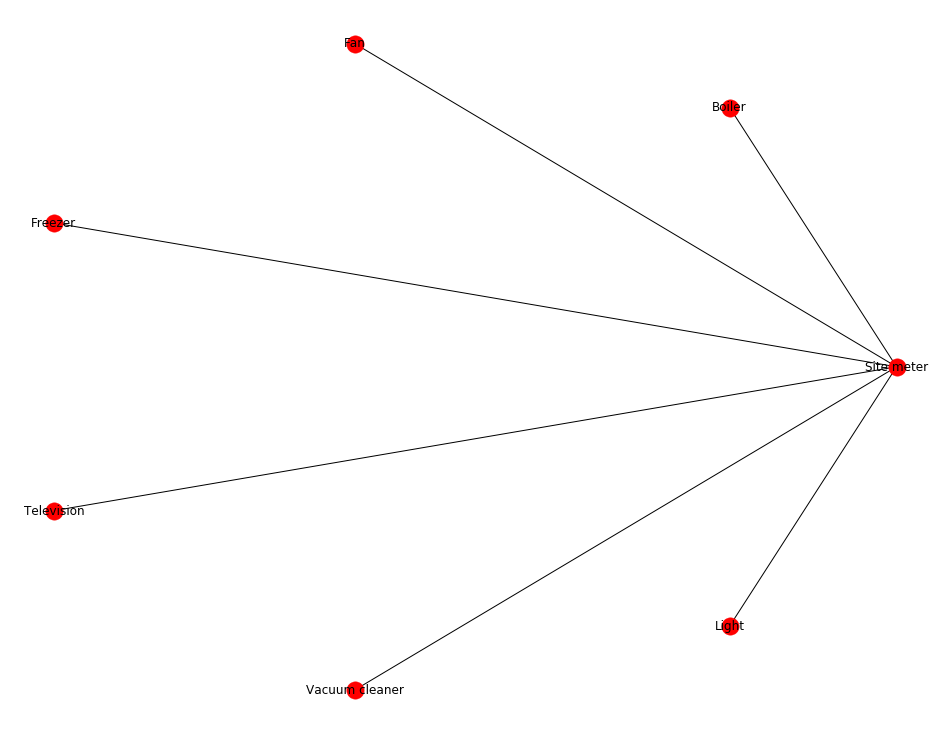

In [65]:
elec.draw_wiring_graph()

No es muy bonito, pero muestra que los medidores (1,2) (los medidores del sitio) están aguas arriba de todos los demás medidores.

Los edificios en REDD tienen solo dos niveles en su jerarquía de medidores (red y submedidores). Si hubiera más de dos niveles, entonces podría ser útil obtener solo los medidores inmediatamente aguas abajo de la red.

In [66]:
elec.meters_directly_downstream_of_mains()

MeterGroup(meters=
  ElecMeter(instance=2, building=1, dataset='DSUAL', appliances=[Appliance(type='boiler', instance=1)])
  ElecMeter(instance=3, building=1, dataset='DSUAL', appliances=[Appliance(type='fan', instance=1)])
  ElecMeter(instance=4, building=1, dataset='DSUAL', appliances=[Appliance(type='freezer', instance=1)])
  ElecMeter(instance=5, building=1, dataset='DSUAL', appliances=[Appliance(type='television', instance=1)])
  ElecMeter(instance=6, building=1, dataset='DSUAL', appliances=[Appliance(type='vacuum cleaner', instance=1)])
  ElecMeter(instance=7, building=1, dataset='DSUAL', appliances=[Appliance(type='light', instance=1)])
)

### Trazar los electrodomésticos cuando estén en uso

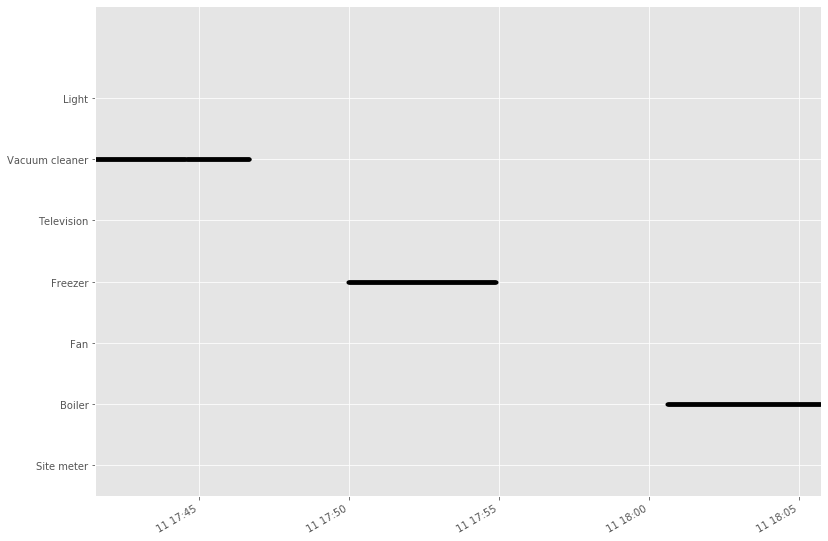

In [67]:
#sns.set_palette("Set3", n_colors=12)
# Set a threshold to remove residual power noise when devices are off
elec.plot_when_on(on_power_threshold = 40)

## Estadísticas e información para medidores individuales

La clase 'ElecMeter' representa un solo medidor de electricidad. Cada ElecMeter tiene una lista de objetos de dispositivo asociados. ElecMeter tiene muchos de los mismos métodos de estadísticas que MeterGroup, como 'total_energy' , 'available_power_ac_types' , 'power_series', 'power_series_all_data'. Ahora exploraremos algunas funciones de estadísticas más (muchas de las cuales también están disponibles en MeterGroup) ...

In [68]:
fridge_meter = elec['fridge']

### Obtener medidor de aguas arriba (upstream meter)

In [69]:
fridge_meter.upstream_meter() # happens to be the mains meter group!

ElecMeter(instance=1, building=1, dataset='DSUAL', site_meter, appliances=[])

### Metadatos sobre la clase de medidor

In [70]:
fridge_meter.device

{'model': 'OZM',
 'manufacturer': 'ual',
 'manufacturer_url': 'https://openzmeter.com/',
 'description': 'Multifunction meter for feeders',
 'sample_period': 60,
 'max_sample_period': 300,
 'measurements': [{'physical_quantity': 'power',
   'type': 'active',
   'upper_limit': 10000,
   'lower_limit': 0},
  {'physical_quantity': 'power',
   'type': 'apparent',
   'upper_limit': 10000,
   'lower_limit': 0},
  {'physical_quantity': 'power',
   'type': 'reactive',
   'upper_limit': 10000,
   'lower_limit': 0},
  {'physical_quantity': 'frequency',
   'type': None,
   'upper_limit': 70,
   'lower_limit': 0},
  {'physical_quantity': 'voltage',
   'type': None,
   'upper_limit': 270,
   'lower_limit': 0},
  {'physical_quantity': 'pf',
   'type': None,
   'upper_limit': 1,
   'lower_limit': 0},
  {'physical_quantity': 'current',
   'type': None,
   'upper_limit': 100,
   'lower_limit': 0}]}

### Aparato dominante

Si los metadatos especifican que un medidor tiene varios medidores conectados, entonces uno de ellos se puede especificar como el dispositivo 'dominante', y este dispositivo se puede recuperar con este método:

In [71]:
fridge_meter.dominant_appliance()

Appliance(type='freezer', instance=1)

###  Energia total

In [72]:
fridge_meter.total_energy() # kWh

active    0.003843
dtype: float64

### Obtener buenas secciones

Si graficamos los datos de potencia sin procesar, vemos que hay una gran brecha donde, supuestamente, el sistema de medición no estaba funcionando. (si tuviéramos que acercarnos, también veríamos muchos espacios más pequeños):

In [73]:
fridge_meter.plot()

C:\Users\carlo\anaconda3\envs\nilmtk-env\lib\site-packages\nilmtk\elecmeter.py:440: UserWarning: The provided sample_period (1e-57) is shorter than the meter's sample_period (60)
  sample_period, default_sample_period


ZeroDivisionError: integer division or modulo by zero

Podemos identificar automáticamente las 'secciones buenas' (es decir, las secciones donde cada par de muestras consecutivas es menor que 'max_sample_period` especificado en los metadatos del conjunto de datos):

In [74]:
good_sections = fridge_meter.good_sections(full_results=True)
# especificando full_results = False nos daría una lista simple de
# TimeFrames. Pero queremos el objeto GoodSectionsResults completo para poder
# trazar las buenas secciones ...

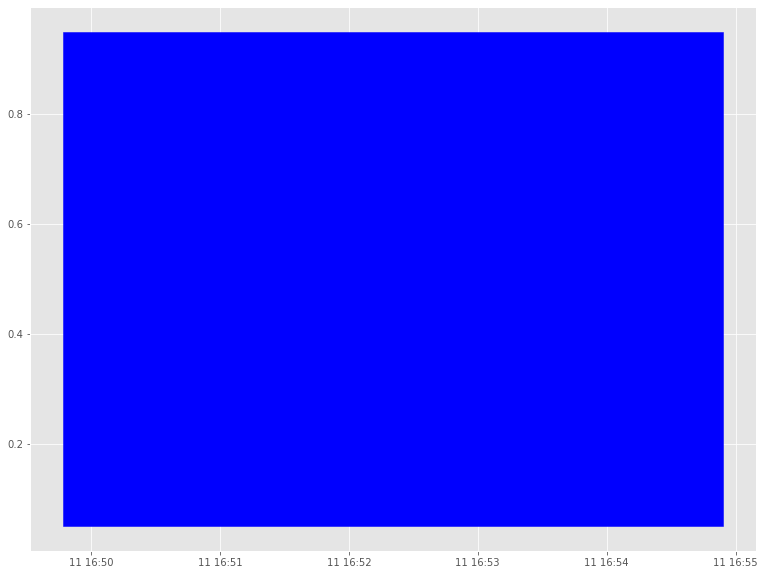

In [75]:
good_sections.plot()

Los fragmentos azules muestran dónde son buenos los datos. La brecha blanca es la gran brecha que se observa en los datos de potencia bruta. Hay muchos huecos más pequeños que no podemos ver en este nivel de zoom.

También podemos ver las secciones exactas identificadas:

In [76]:
good_sections.combined()

[TimeFrame(start='2021-11-11 17:49:47+01:00', end='2021-11-11 17:54:54+01:00', empty=False)]

### Dropout rate (tasa de deserción )

Además de que aparecen grandes lagunas debido a que todo el sistema está inactivo, también tenemos pequeñas lagunas frecuentes debido a que los sensores inalámbricos arrojan datos. A esto a veces se le llama "abandono". La tasa de abandono es un número entre 0 y 1 que especifica la proporción de muestras que faltan. Una tasa de abandono de 0 significa que no faltan muestras. Un valor de 1 significaría que faltan todas las muestras:

In [77]:
fridge_meter.dropout_rate()

0.0

Tenga en cuenta que la tasa de deserción ha disminuido (¡lo cual es bueno!) Ahora que estamos ignorando las brechas. Este valor probablemente sea más representativo del rendimiento del sistema inalámbrico.

## Seleccion de  subgrupos de medidores

Usamos ElecMeter.select_using_appliances () para seleccionar un nuevo MeterGroup usando un campo de metadatos. Por ejemplo, para obtener todas las neverass del conjunto de datos DSUALM::

In [78]:
import nilmtk
nilmtk.global_meter_group.select_using_appliances(type='freezer')

MeterGroup(meters=
  ElecMeter(instance=4, building=1, dataset='DSUAL', appliances=[Appliance(type='freezer', instance=1)])
)

O seleccione varios tipos de aparatos:

In [79]:
elec.select_using_appliances(type=['fridge', 'fan'])

MeterGroup(meters=
  ElecMeter(instance=4, building=1, dataset='DSUAL', appliances=[Appliance(type='freezer', instance=1)])
  ElecMeter(instance=3, building=1, dataset='DSUAL', appliances=[Appliance(type='fan', instance=1)])
)

O todos los electrodomésticos de la categoría 'boiler'

In [80]:
#nilmtk.global_meter_group.select_using_appliances(category='boiler')

O todos los electrodomésticos del edificio 1 con motor de inducción monofásico (!):

In [81]:
nilmtk.global_meter_group.select_using_appliances(building=1, category='single-phase induction motor')

MeterGroup(meters=
  ElecMeter(instance=2, building=1, dataset='DSUAL', appliances=[Appliance(type='boiler', instance=1)])
  ElecMeter(instance=3, building=1, dataset='DSUAL', appliances=[Appliance(type='fan', instance=1)])
  ElecMeter(instance=4, building=1, dataset='DSUAL', appliances=[Appliance(type='freezer', instance=1)])
  ElecMeter(instance=6, building=1, dataset='DSUAL', appliances=[Appliance(type='vacuum cleaner', instance=1)])
)

(NILMTK importa los 'metadatos comunes' del proyecto de metadatos NILM, que incluye una amplia gama de taxonomías de diferentes categorías)(http://nilm-metadata.readthedocs.org/en/latest/central_metadata.html#appliancetype))

In [82]:
# nilmtk.global_meter_group.select_using_appliances(building=2, category='laundry appliances')

### Seleccion de  un grupo de medidores de las propiedades de los medidores (no de los electrodomésticos) 

In [83]:
#elec.select(device_model='REDD_whole_house')

In [84]:
#elec.select(sample_period=3)

## Selección de  un solo medidor de un grupo de medidores

Usamos `[]` para recuperar un solo `ElecMeter` de un` MeterGroup`.

### Busqueda de  un medidor usando aparatos conectados a cada medidor

In [85]:
elec['fridge']

ElecMeter(instance=4, building=1, dataset='DSUAL', appliances=[Appliance(type='freezer', instance=1)])

Los electrodomésticos se identifican de forma única dentro de un edificio mediante un tipo (nevera, hervidor, televisión, etc.) y un número de instancia. Si no especificamos un número de instancia, ElecMeter recupera la instancia 1 (la numeración de instancias comienza desde 1). Si desea una instancia diferente, simplemente haga esto:

In [86]:
elec.select_using_appliances(type='freezer')

MeterGroup(meters=
  ElecMeter(instance=4, building=1, dataset='DSUAL', appliances=[Appliance(type='freezer', instance=1)])
)

In [87]:
elec['freezer', 1]

ElecMeter(instance=4, building=1, dataset='DSUAL', appliances=[Appliance(type='freezer', instance=1)])

Para identificar de forma única un dispositivo en nilmtk.global_meter_group, debemos especificar el nombre del conjunto de datos, el número de instancia del edificio, el tipo de dispositivo y la instancia del dispositivo en un dictado.

In [88]:
import nilmtk
nilmtk.global_meter_group[{'dataset': 'DSUAL', 'building': 1, 'type': 'freezer', 'instance': 1}]

ElecMeter(instance=4, building=1, dataset='DSUAL', appliances=[Appliance(type='freezer', instance=1)])

### Busqueda de  un medidor usando los detalles del ElecMeterr

get ElecMeter with instance = 1:

In [89]:
elec[1]

ElecMeter(instance=1, building=1, dataset='DSUAL', site_meter, appliances=[])

### Numeración de instancias

Los números de instancia de ElecMeter y Appliance identifican de manera única el tipo de medidor o dispositivo dentro del edificio, no globalmente. Para identificar un medidor de forma única a nivel mundial, necesitamos tres claves:

In [107]:
from nilmtk.elecmeter import ElecMeterID 
# ElecMeterID is a namedtuple for uniquely identifying each ElecMeter

nilmtk.global_meter_group[ElecMeterID(instance=1, building=1, dataset='DSUAL')]

ElecMeter(instance=1, building=1, dataset='DSUAL', site_meter, appliances=[])

Seleccion de un MeterGroup anidado (nested MeterGroup)

También podemos seleccionar un solo MeterGroup anidado existente. Hay dos formas de especificar un MeterGroup anidado:

In [108]:
elec[[ElecMeterID(instance=3, building=1, dataset='DSUAL'), 
      ElecMeterID(instance=4, building=1, dataset='DSUAL')]]

KeyError: [ElecMeterID(instance=3, building=1, dataset='DSUAL'), ElecMeterID(instance=4, building=1, dataset='DSUAL')]

In [112]:
elec[ElecMeterID(instance=(3,4), building=1, dataset='DSUAL')]

KeyError: ElecMeterID(instance=(3, 4), building=1, dataset='DSUAL')

También podemos especificar la red solicitando la instancia de medidor 0:

In [110]:
elec[ElecMeterID(instance=0, building=1, dataset='DSUAL')]

ElecMeter(instance=1, building=1, dataset='DSUAL', site_meter, appliances=[])

que es equivalente a elec.mains ():

In [111]:
elec.mains() == elec[ElecMeterID(instance=0, building=1, dataset='DSUAL')]

True

## Trazar datos submedidos para un solo día

C:\Users\carlo\anaconda3\envs\nilmtk-env\lib\site-packages\nilmtk\elecmeter.py:440: UserWarning: The provided sample_period (12) is shorter than the meter's sample_period (60)
  sample_period, default_sample_period


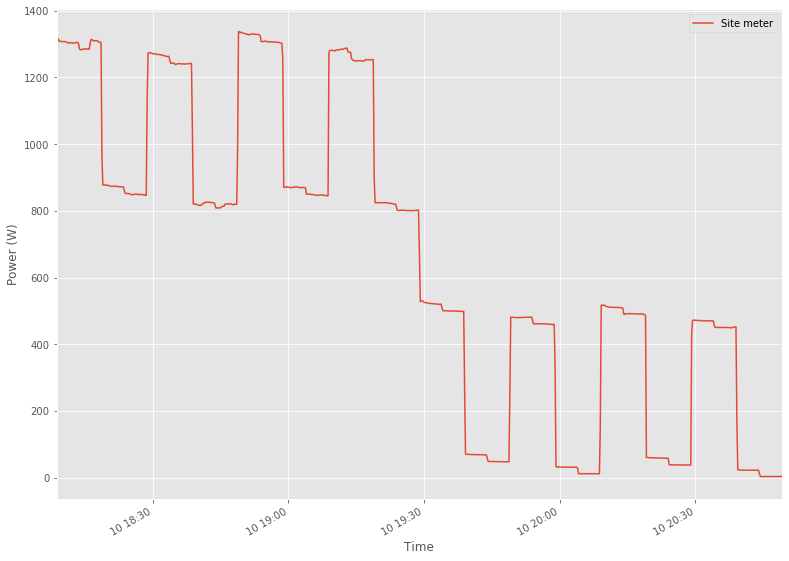

In [113]:
dsualm.set_window(start='2021-11-10', end='2021-11-11')
elec.plot();
plt.xlabel("Time");

## Gráfico de autocorrelación

In [103]:
from pandas.plotting import autocorrelation_plot

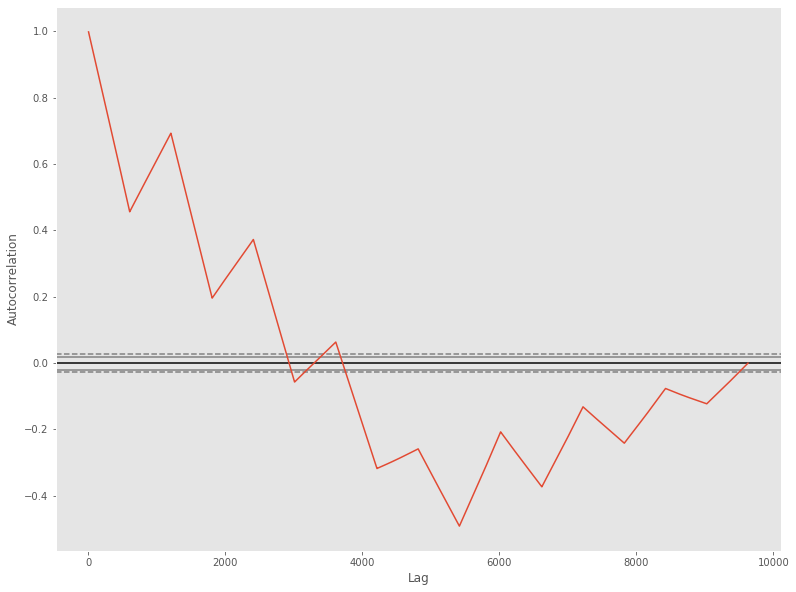

In [104]:
elec.mains().plot_autocorrelation();

## Consumo de energía diario en todos los light del conjunto de datos

In [105]:
light_restricted = nilmtk.global_meter_group.select_using_appliances(type='light')
daily_energy = pd.Series([meter.average_energy_per_period(offset_alias='D') 
                          for meter in light_restricted.meters])

# daily_energy.plot(kind='hist');
# plt.title('Histogram of daily fridge energy');
# plt.xlabel('energy (kWh)');
# plt.ylabel('occurences');
# plt.legend().set_visible(False)

daily_energy

0   NaN
dtype: float64

## Marco de datos de correlación de los dispositivos

In [106]:
correlation_df = elec.pairwise_correlation()
correlation_df

,"(1, 1, DSUAL)","(2, 1, DSUAL)","(3, 1, DSUAL)","(4, 1, DSUAL)","(5, 1, DSUAL)","(6, 1, DSUAL)","(7, 1, DSUAL)"
"(1, 1, DSUAL)",1,NaN,NaN,NaN,NaN,NaN,NaN
"(2, 1, DSUAL)",NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(3, 1, DSUAL)",NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(4, 1, DSUAL)",NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(5, 1, DSUAL)",NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(6, 1, DSUAL)",NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(7, 1, DSUAL)",NaN,NaN,NaN,NaN,NaN,NaN,NaN
